# Heirarchial Clustering

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [9]:
data = pd.read_csv('Engg_College_Data.csv', index_col='Engg_College')
data.drop('SR_NO', axis=1, inplace=True)

In [13]:
data.head()

,Teaching,Fees,Placements,Internship,Infrastructure
Engg_College,,,,,
A,5,2,5,5,3
B,4,2,5,5,3
C,4,5,5,4,5
D,5,4,5,4,4
E,2,5,2,2,5


## Plotting a dendrogram

Text(0, 0.5, 'Distance')

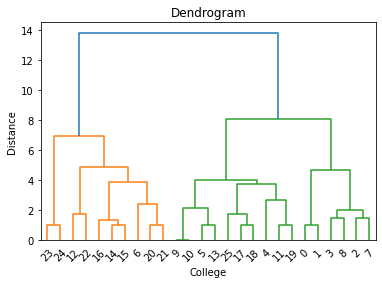

In [16]:
dend = dendrogram(linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('College')
plt.ylabel('Distance')

### No. of clusters = 4 via dendrogram

## Training heirarchial model

In [18]:
model = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')

In [42]:
pred = model.fit_predict(data)

## Show clusters data

In [46]:
pred_df = pd.DataFrame(pred, index=data.index)

In [54]:
cluster_data = pd.concat([data,pred_df], axis=1)

In [55]:
cluster_data.rename(columns={0:"Cluster"}, inplace=True)

In [67]:
cluster_data

,Teaching,Fees,Placements,Internship,Infrastructure,Cluster
Engg_College,,,,,,
A,5,2,5,5,3,1
B,4,2,5,5,3,1
C,4,5,5,4,5,1
D,5,4,5,4,4,1
E,2,5,2,2,5,2
F,3,4,3,3,4,2
G,1,3,1,1,2,0
H,4,4,5,5,5,1
I,4,4,4,4,4,1


# K means clustering

In [74]:
from sklearn.cluster import KMeans

## Fitting Data into K means

In [75]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

C:\Users\aurlu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Plot Elbow Curve

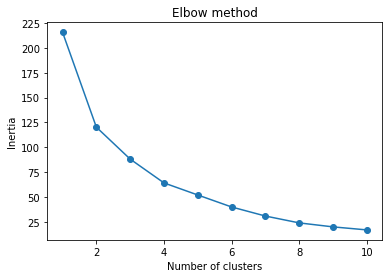

In [77]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Optimal value of K = 3

## K Means model with 3 clusters

In [116]:
km_model = KMeans(n_clusters=3, init='k-means++', random_state=0) 
km_pred = km_model.fit_predict(data)

In [117]:
km_model.cluster_centers_

array([[2.8       , 4.5       , 3.3       , 2.8       , 3.8       ],
       [1.9       , 2.7       , 1.3       , 1.7       , 2.6       ],
       [4.33333333, 3.5       , 4.83333333, 4.5       , 4.        ]])

In [118]:
km_model.inertia_

88.16666666666667

## Show Cluster Data

In [121]:
km_pred_df = pd.DataFrame(km_pred, index=data.index)

In [123]:
km_cluster = pd.concat([data,km_pred_df], axis=1)

In [124]:
km_cluster.rename(columns={0:"Cluster"}, inplace=True)

In [125]:
km_cluster

,Teaching,Fees,Placements,Internship,Infrastructure,Cluster
Engg_College,,,,,,
A,5,2,5,5,3,2
B,4,2,5,5,3,2
C,4,5,5,4,5,2
D,5,4,5,4,4,2
E,2,5,2,2,5,0
F,3,4,3,3,4,0
G,1,3,1,1,2,1
H,4,4,5,5,5,2
I,4,4,4,4,4,2
